<a href="https://colab.research.google.com/github/sheng-999/simplepython/blob/main/Enrich_users_profiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 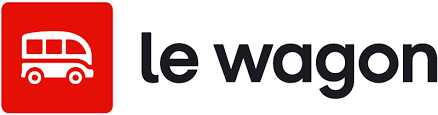

# Enrich users profiles

a) Import the [`microsoft_companies.json`](https://drive.google.com/file/d/1Zrja9KY-05u8XsGfK-P97zGa-NyipS49/view?usp=sharing) file into Colab.

Run the code below to get the results in the `microsoft_companies` variable. We will study tomorrow how to load data in Python.

In [4]:
import json

with open('microsoft_companies.json') as json_file:
    microsoft_companies = json.load(json_file)

b) What is the type of the `microsoft_companies` variable?

In [5]:
type(microsoft_companies)

list

c) How many companies are in this list?

In [6]:
len(microsoft_companies)

301

d) Look at the first item on this list. What type is it?

In [7]:
microsoft_companies[0]

{'datasetid': 'companies-on-linkedin',
 'recordid': 'c4d310fc0f0f277e574e20f5e2185d4765a1ab3f',
 'fields': {'total_employee_estimate': 44,
  'size_range': '11 - 50',
  'industry': 'computer games',
  'linkedin_url': 'https://www.linkedin.com/company/develop-magazine',
  'domain0': 'https://www.develop-online.net',
  'current_employee_estimate': 6,
  'name': 'microsoft'},
 'record_timestamp': '2019-06-03T09:35:00+02:00'}

In [8]:
type(microsoft_companies[0])

dict

e) For this first item, display the company name, industry, field and total number of employees.

In [23]:
# to get the main keys first
microsoft_companies[0].keys()

dict_keys(['datasetid', 'recordid', 'fields', 'record_timestamp'])

In [24]:
company_name = microsoft_companies[0]['fields']['name']
industry = microsoft_companies[0]['fields']['industry']
field = microsoft_companies[0]['fields']['domain0']
total_employees = microsoft_companies[0]['fields']['total_employee_estimate']

print(f"{company_name}, \n{industry}, \n{field}, \n{total_employees}")

microsoft, 
computer games, 
https://www.develop-online.net, 
44


f) Do you think that this company "microsoft" is the giant American company?

It's not a giant company if we only consider the number of employees.

g) So it looks like there are homonyms.

Create a new empty list and add all the companies whose names are exactly "microsoft".

To do this, you will need to loop through all the companies and use a condition to check that their names are indeed "microsoft". If this is the case, the company information will be added to the empty list.

How many are there?

In [50]:
exact_microsoft_companies = []

# iterate through all companies
for company_info in microsoft_companies:
    # if statement: Check if the company name is "microsoft", get value 'name' in lower.()
    if company_info['fields'].get('name', '').lower() == "microsoft":
      exact_microsoft_companies.append(company_info)


print(exact_microsoft_companies)

[{'datasetid': 'companies-on-linkedin', 'recordid': 'c4d310fc0f0f277e574e20f5e2185d4765a1ab3f', 'fields': {'total_employee_estimate': 44, 'size_range': '11 - 50', 'industry': 'computer games', 'linkedin_url': 'https://www.linkedin.com/company/develop-magazine', 'domain0': 'https://www.develop-online.net', 'current_employee_estimate': 6, 'name': 'microsoft'}, 'record_timestamp': '2019-06-03T09:35:00+02:00'}, {'datasetid': 'companies-on-linkedin', 'recordid': 'd8611a51def434f1049b899a99d8a589fbb7b9c1', 'fields': {'total_employee_estimate': 276983, 'size_range': '10001+', 'year_founded': '1975', 'industry': 'computer software', 'locality': 'redmond,washington,united states', 'linkedin_url': 'https://www.linkedin.com/company/microsoft', 'country': 'united states', 'domain0': 'https://www.microsoft.com', 'current_employee_estimate': 116196, 'name': 'microsoft'}, 'record_timestamp': '2019-06-03T09:35:00+02:00'}, {'datasetid': 'companies-on-linkedin', 'recordid': 'a5140838fb9ffcda43fa4b8f35cd

In [51]:
len(exact_microsoft_companies)

6

h) Among the results obtained, do you see the giant American company?

You can run the code below and then use the `pprint` function to indent the results.

You can use it like print function.

In [52]:
from pprint import pprint

In [53]:
pprint(exact_microsoft_companies)

[{'datasetid': 'companies-on-linkedin',
  'fields': {'current_employee_estimate': 6,
             'domain0': 'https://www.develop-online.net',
             'industry': 'computer games',
             'linkedin_url': 'https://www.linkedin.com/company/develop-magazine',
             'name': 'microsoft',
             'size_range': '11 - 50',
             'total_employee_estimate': 44},
  'record_timestamp': '2019-06-03T09:35:00+02:00',
  'recordid': 'c4d310fc0f0f277e574e20f5e2185d4765a1ab3f'},
 {'datasetid': 'companies-on-linkedin',
  'fields': {'country': 'united states',
             'current_employee_estimate': 116196,
             'domain0': 'https://www.microsoft.com',
             'industry': 'computer software',
             'linkedin_url': 'https://www.linkedin.com/company/microsoft',
             'locality': 'redmond,washington,united states',
             'name': 'microsoft',
             'size_range': '10001+',
             'total_employee_estimate': 276983,
             'year_f

Yes, the one with 276983 employees.

i) To facilitate the work of the other teams, we will translate the number of employees into categories. To do this, we will use the following correspondences:
   - less than 5: "small business
   - from 5 to 30: "startup
   - from 30 to 200: "scaleup
   - from 200 to 1000: "big companies
   - more than 1000: "very large companies


Write a function with one parameter, representing the number of employees, and returns its corresponding category.

Don't forget to return the corresponding category at the end of your function using the **return** keyword. Look carefully at the syntax of the functions in your course.

In [54]:
def from_nb_employee_to_category(total_employee):

    category = ""
    if total_employee < 5:
      category = "small business"
    elif total_employee in range(5,31):
      category = "startup"
    elif total_employee in range(31, 201):
      category = "scaleup"
    elif total_employee in range(201,1001):
      category = "big companies"
    elif total_employee > 1000:
      category = "very large companies"
    return category

print(from_nb_employee_to_category(23))

startup


In [55]:
from_nb_employee_to_category(200)

'scaleup'

In [56]:
from_nb_employee_to_category(666)

'big companies'

In [58]:
exact_microsoft_companies

[{'datasetid': 'companies-on-linkedin',
  'recordid': 'c4d310fc0f0f277e574e20f5e2185d4765a1ab3f',
  'fields': {'total_employee_estimate': 44,
   'size_range': '11 - 50',
   'industry': 'computer games',
   'linkedin_url': 'https://www.linkedin.com/company/develop-magazine',
   'domain0': 'https://www.develop-online.net',
   'current_employee_estimate': 6,
   'name': 'microsoft'},
  'record_timestamp': '2019-06-03T09:35:00+02:00'},
 {'datasetid': 'companies-on-linkedin',
  'recordid': 'd8611a51def434f1049b899a99d8a589fbb7b9c1',
  'fields': {'total_employee_estimate': 276983,
   'size_range': '10001+',
   'year_founded': '1975',
   'industry': 'computer software',
   'locality': 'redmond,washington,united states',
   'linkedin_url': 'https://www.linkedin.com/company/microsoft',
   'country': 'united states',
   'domain0': 'https://www.microsoft.com',
   'current_employee_estimate': 116196,
   'name': 'microsoft'},
  'record_timestamp': '2019-06-03T09:35:00+02:00'},
 {'datasetid': 'compan

j) We will go through all the companies in the initial file.

We will create an empty list that will record all the information about each company as we go along.

For each company, store its name, industry, domain and company category in relation to its number of employees (using your previous function) in a **dictionary**. Then add this dictionary to your list.

In the end, your list will contain all the dictionaries of all the companies.

In [68]:
from unicodedata import category
microsoft_companies_clean = []

# for each company in the list
for company_info in microsoft_companies:
  # set the main key from main list as a new list in order to faciliate find values :
  fields = company_info['fields']

  # get value from list fields
  name = fields.get('name','')
  industry = fields.get('industry', '')
  domain = fields.get('domain0',None)
  total_employees = fields.get('total_employee_estimate', 0)

    # create new dictionnary with required infos

  dict_company = {
    'name': name,
    'industry': industry,
    'domain': domain,

    # recall the function & set the default value with variable total_employees
    'category': from_nb_employee_to_category(total_employees)

    }

  microsoft_companies_clean.append(dict_company)
    # add dict_company to microsoft_companies_clean list


microsoft_companies_clean[0]

{'name': 'microsoft',
 'industry': 'computer games',
 'domain': 'https://www.develop-online.net',
 'category': 'scaleup'}

In [69]:
microsoft_companies_clean[4]

{'name': 'locatelli mcc - designing domotica (voip) solutions combined with microsoft lync services!',
 'industry': 'information technology and services',
 'domain': 'https://www.locatelli-mcc.com',
 'category': 'small business'}

k) Use the code below to create a DataFrame from it.

In [65]:
import pandas as pd

df_microsoft_companies_clean = pd.DataFrame(microsoft_companies_clean)
df_microsoft_companies_clean


,name,industry,domain,category
0,microsoft,computer games,https://www.develop-online.net,scaleup
1,omaha microsoft technology group,information technology and services,https://www.omahamtg.com,small business
2,microsoft alumni network ambassadors,non-profit organization management,https://www.,small business
3,scbn | microsoft certified professional - goog...,internet,https://www.scbn.biz,startup
4,locatelli mcc - designing domotica (voip) solu...,information technology and services,https://www.locatelli-mcc.com,small business
...,...,...,...,...
296,pmx dynamics-business software for the real es...,information technology and services,https://www.pmxdynamics.com,startup
297,microsoft game studios,computer software,https://www.,startup
298,microsoft alumni foundation,philanthropy,https://www.microsoftalumni.org,startup
299,naveksa a/s - manufacturing solutions for micr...,computer software,https://www.,small business


Congratulations! This is your first DataFrame.

l) What do you notice about domains column ?

When no domain has been found API outputs "https://www.".

This piece of information is not relevant to other teams. Change your code to delete that.

One way to do so is to not store this key/value pair when iterating over all companies.

In [80]:
microsoft_companies_clean = []

# for each company in the list
for company_info in microsoft_companies:
    fields = company_info['fields']
    name = fields.get('name','')
    industry = fields.get('industry', '')
    domain = fields.get('domain0',None)
    total_employees = fields.get('total_employee_estimate', 0)


 # test domain and add the key to dictionnary if needed
    # check domain values to avoid invalid values like :
    if domain == 'https://www.':
      domain = None

    # create new dictionnary
    dic_company = {
    'name': name,
    'industry': industry,
    'domain': domain,
    'category': from_nb_employee_to_category(total_employees)
    }

    # add dictionary result to microsoft_companies_clean list
    microsoft_companies_clean.append(dic_company)


df_microsoft_companies_clean = pd.DataFrame(microsoft_companies_clean)
df_microsoft_companies_clean

,name,industry,domain,category
0,microsoft,computer games,https://www.develop-online.net,scaleup
1,omaha microsoft technology group,information technology and services,https://www.omahamtg.com,small business
2,microsoft alumni network ambassadors,non-profit organization management,None,small business
3,scbn | microsoft certified professional - goog...,internet,https://www.scbn.biz,startup
4,locatelli mcc - designing domotica (voip) solu...,information technology and services,https://www.locatelli-mcc.com,small business
...,...,...,...,...
296,pmx dynamics-business software for the real es...,information technology and services,https://www.pmxdynamics.com,startup
297,microsoft game studios,computer software,None,startup
298,microsoft alumni foundation,philanthropy,https://www.microsoftalumni.org,startup
299,naveksa a/s - manufacturing solutions for micr...,computer software,None,small business


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_microsoft_companies_clean, *['category'], **{})
chart